<a href="https://colab.research.google.com/github/IdealisticINTJ/My_Machine_Learning_Projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 

import logging
logging.getLogger('tensorflow').disabled = True

# Fetching the "Fashion MNIST" data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizing / rescaling the values.
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mapping for easy class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


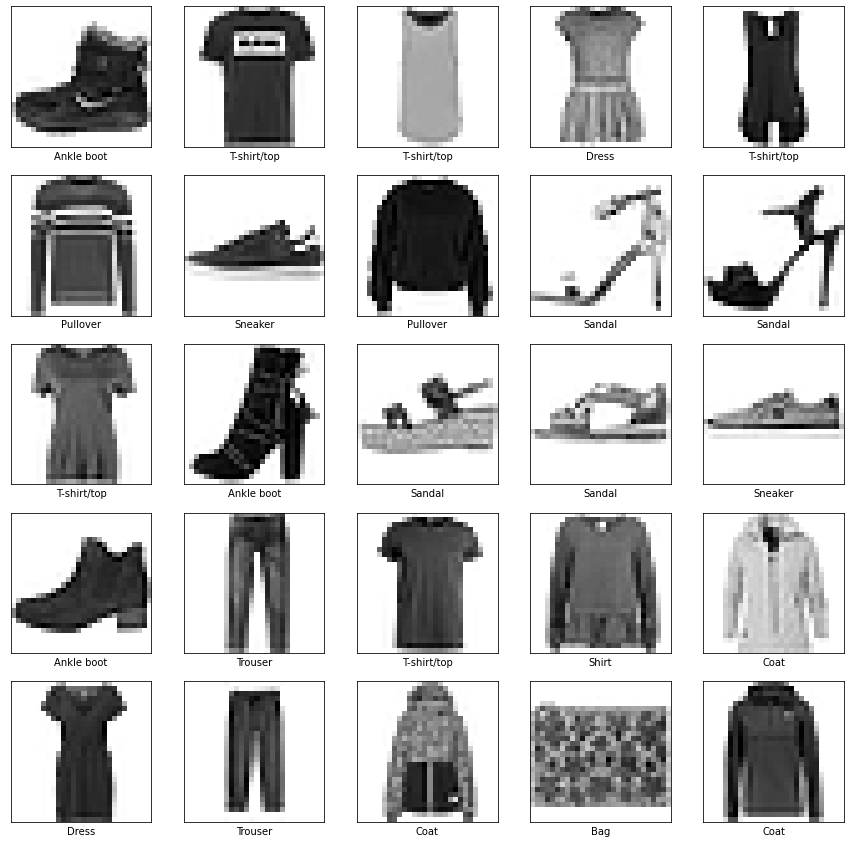

In [3]:
# Visualising the first 25 images from training data
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

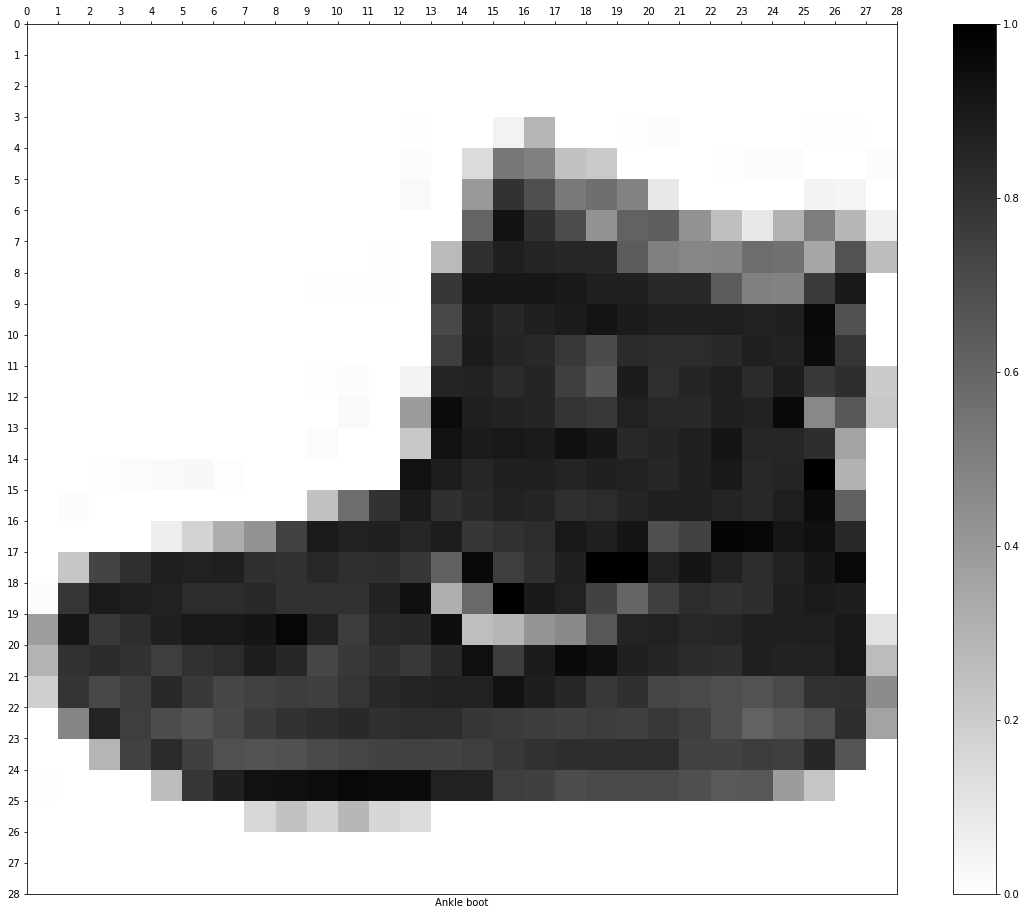

In [5]:
# Visualising the images with pixel values
index = 0
plt.figure(figsize=(20,16))
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[index]])
plt.colorbar()
#plt.grid(True)
#plt.rc('grid', linestyle="-", color='fuchsia')

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))
ax.set_xticklabels(np.arange(0, 29, 1))
ax.set_yticklabels(np.arange(0, 29, 1))
ax.xaxis.tick_top()
plt.show()

In [6]:
model = tf.keras.models.Sequential()

# A convolutional layer that will extract features from 
# the input images by sliding a convolution filter over the input image, 
# resulting in a feature map.

model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', # Note: Rectified Linear Unit Activation Function
        input_shape=(28, 28, 1)
    )
) 

# We will add a Maxpooling layer, which will reduce the 
# dimensionality of each feature, which reduces the number of parameters that 
# the model needs to learn, which in turn, shortens the training time!
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)
# Now, adding a dropout layer. This overcomes the issue of overfitting and forces the model to 
# learn multiple representations of the same data by randomly disabling neurons 
# in the learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)

# Flattening the obtained output to a 1D 
# vector before being fed to the Dense Layers.
model.add(
    tf.keras.layers.Flatten()
)

# A dense (interconnected) layer is added for mapping the derived features 
# to the required class.
model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=10, 
        activation='softmax' # Softmax Activation Function
    )
)

# Building the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)

# Displaying a summary of the models structure in the end
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

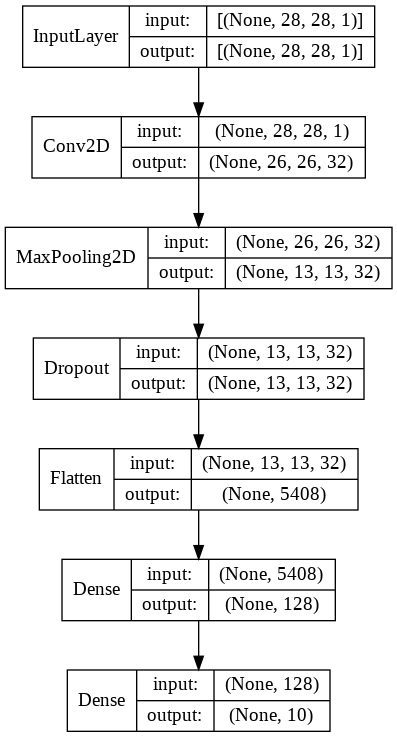

In [7]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [8]:
# Adding an empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Training the CNN on the training data
history = model.fit(
      x_train, y_train,
      batch_size=256, 

      # An epoch is an iteration over the entire training data.
      epochs=10, 
      
      validation_split=0.2, 

      verbose=1)


Epoch 1/10
188/188 [==============================] - 23s 119ms/step - loss: 0.7819 - accuracy: 0.7307 - val_loss: 0.4036 - val_accuracy: 0.8560
Epoch 2/10
188/188 [==============================] - 22s 115ms/step - loss: 0.3632 - accuracy: 0.8724 - val_loss: 0.3199 - val_accuracy: 0.8884
Epoch 3/10
188/188 [==============================] - 22s 116ms/step - loss: 0.3154 - accuracy: 0.8889 - val_loss: 0.2965 - val_accuracy: 0.8972
Epoch 4/10
188/188 [==============================] - 22s 115ms/step - loss: 0.2870 - accuracy: 0.8969 - val_loss: 0.2864 - val_accuracy: 0.9001
Epoch 5/10
188/188 [==============================] - 22s 116ms/step - loss: 0.2614 - accuracy: 0.9064 - val_loss: 0.2772 - val_accuracy: 0.9030
Epoch 6/10
188/188 [==============================] - 22s 115ms/step - loss: 0.2457 - accuracy: 0.9116 - val_loss: 0.2786 - val_accuracy: 0.8990
Epoch 7/10
188/188 [==============================] - 22s 116ms/step - loss: 0.2342 - accuracy: 0.9144 - val_loss: 0.2532 - val_ac

In [9]:
# Getting Model Predictions for test data
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.88      0.94      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.72      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



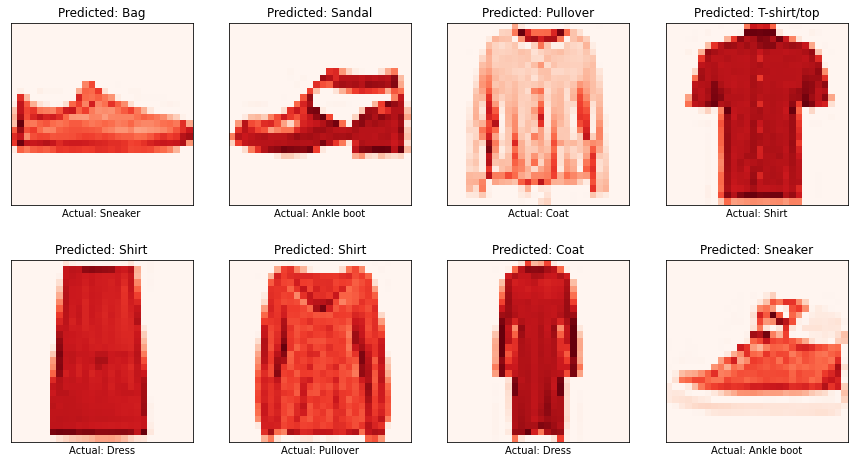

In [10]:
incorrect = np.nonzero(predicted_classes!=y_test)[0]

# Displaying the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))

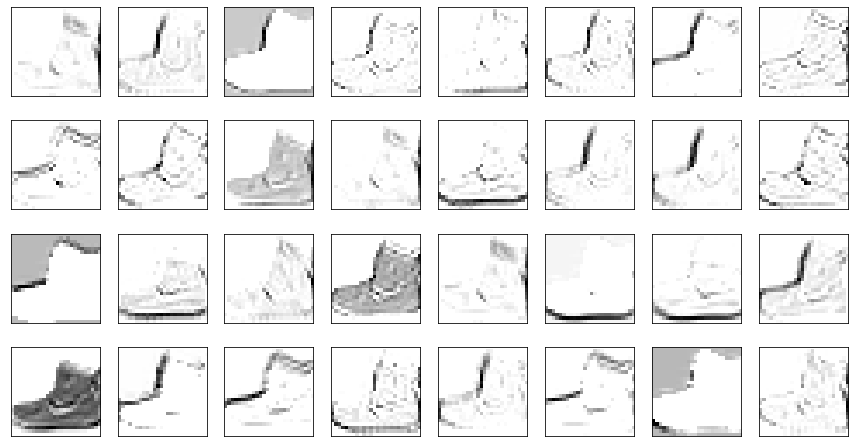

In [11]:
layer_name = 'conv2d' 

layer_dict = {layer.name : layer for layer in model.layers}

modelslice = tf.keras.Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)

image = x_train[0] 

image = np.expand_dims(image, axis=0)

feature_maps = modelslice.predict(image)

plt.figure(figsize=(15, 8))
  
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i-1], cmap=plt.cm.binary)